# Intro to ssvepy

In this file, we'll examine the example dataset that ships with ssvepy.

In [1]:
import mne
import ssvepy
# get an example data set:
from ssvepy.exampledata import epoch_example


20 matching events found
0 projection items activated
0 bad epochs dropped
Reading /Users/jan/Dropbox/Documents/side-projects/ssvepy/ssvepy/exampledata/example-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =       0.00 ...   15996.09 ms (None)
        0 CTF compensation matrices available
16 matching events found
16 matching events found
0 projection items activated


This is a file that's already pre-processed and epoched. You can check it's details like this:

In [2]:
epoch_example

<EpochsFIF  |  n_events : 16 (all good), tmin : 0.0 (s), tmax : 15.99609375 (s), baseline : (0.0, 0.0), ~32.1 MB, data loaded,
 '101': 1, '103': 1, '104': 1, '108': 1, '109': 1, '110': 1, '115': 1, '116': 1, '202': 1, '205': 1, '206': 1, '207': 1, '211': 1, '212': 1, '213': 1, '214': 1>

In this data, the subject was stimulated at 6 Hz. We can create an SSVEP analysis structure like this:

In [3]:
ssvep_example = ssvepy.Ssvep(epoch_example, 6.0, fmin=2, fmax=30)

You can then check, for example, what the power at the stimulation frequency was (averaged over all electrodes):

In [4]:
ssvep_example.stimulation_pow[0].mean()

1.6633987290435652e-09

We can also visualize this power:

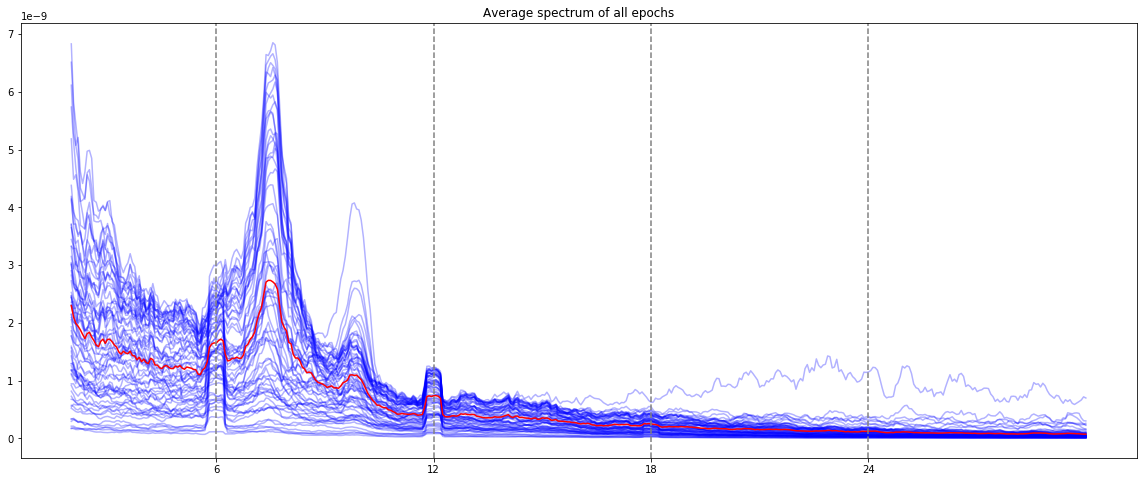

In [5]:
ssvep_example.plot_psd()

We can also check all the harmonic frequencies that have been examined. First, let's check which harmonics were examined by default (since we didn't provide any):

In [6]:
ssvep_example.harmonics

[12.0, 18.0, 24.0]

And let's see what the average power in each of these harmonics was:

In [7]:
for h in ssvep_example.harmonic_pow: print(h.mean())

7.32671446777e-10
2.48359140124e-10
1.20176900729e-10


`ssvepy` also evaluates the signal-to-noise ratio for your frequencies. This is by default done by dividing the average power at, for example, your stimulation frequency, and dividing it by the average power in a 1 Hz band around it. You can set the width of that band yourself when you create the `Ssvep` class.

Let's check out what these SNRs look like

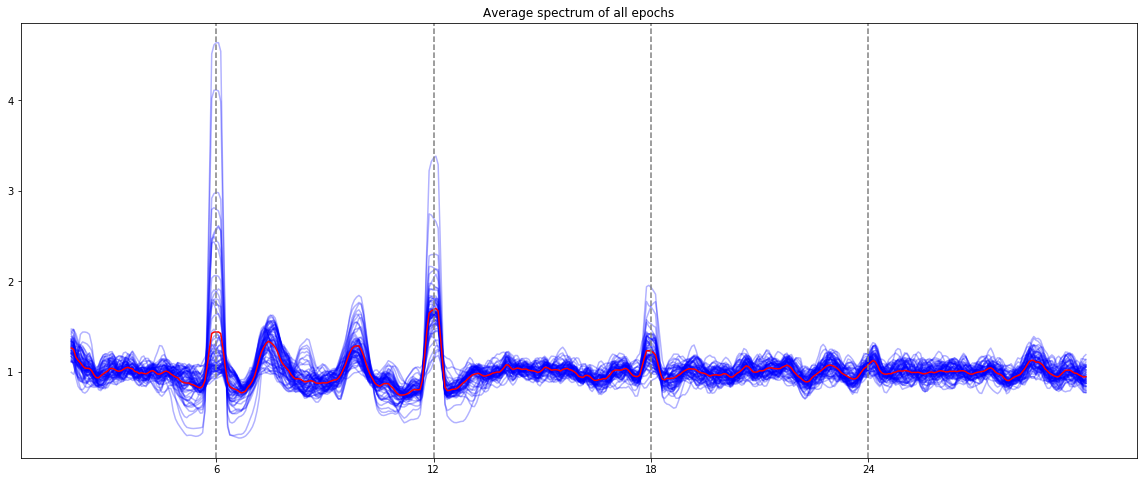

In [8]:
ssvep_example.plot_snr()

Note: the red line is the average of all electrodes, the blue lines are individual electrode. By default, all the frequencies you specified are indicated by vertical lines (the stimulation frequency, and the harmonics / subharmonics.